       Simulated_Loss
count    2.000000e+04
mean     1.091300e+08
std      7.567653e+06
min      8.068607e+07
25%      1.039369e+08
50%      1.091422e+08
75%      1.142863e+08
max      1.388804e+08


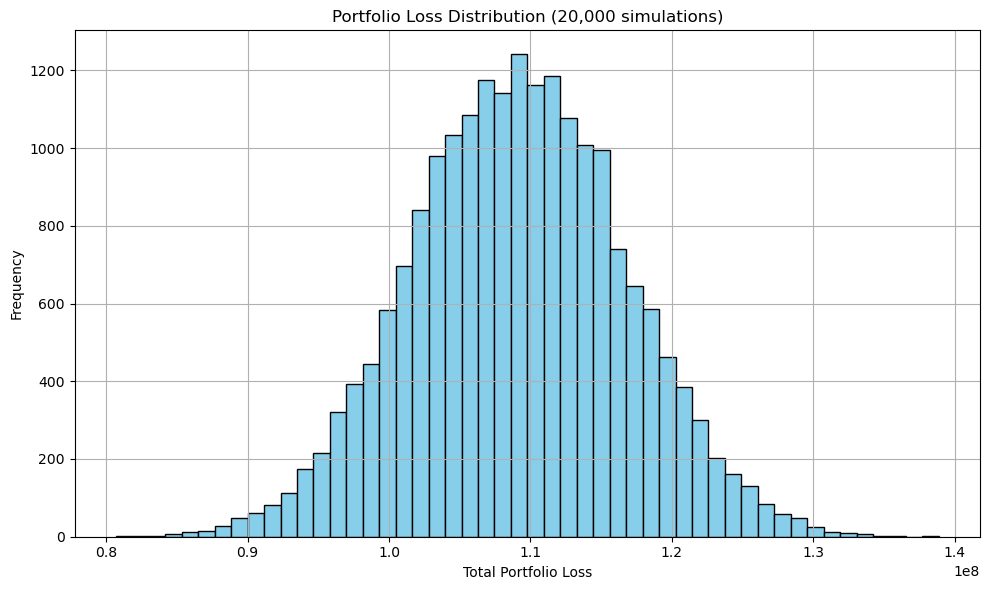

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Step 1: Create dummy data (adjusted for brevity)
np.random.seed(42)
n_loans = 10000
n_simulations = 20000

df = pd.DataFrame({
    'Debt no.': np.arange(1, n_loans + 1),
    'EAD': np.random.uniform(10000, 100000, n_loans),
    'LGD': np.random.beta(2, 3, n_loans) * 100, #Avg. for LGD is 40%
    'PD': np.random.uniform(1, 100, n_loans)
})

# Step 2: CCC Calculation
df['PD_decimal'] = df['PD'] / 100
df['CCC'] = 0.24 - 0.12 * ((1 - np.exp(-50 * df['PD_decimal'])) / (1 - np.exp(-50)))

# Step 3: Precompute constants
ead = df['EAD'].values
lgd = df['LGD'].values / 100
pd_dec = df['PD_decimal'].values
rho = df['CCC'].values
threshold = norm.ppf(pd_dec)

# Step 4: Simulate losses
portfolio_losses = []

for _ in range(n_simulations):
    M = np.random.normal()  # Systematic risk
    epsilon = np.random.normal(size=n_loans)  # Idiosyncratic risks
    Z = rho * M + np.sqrt(1 - rho**2) * epsilon
    default_flags = (Z < threshold).astype(int)
    Lp = default_flags * lgd * ead
    portfolio_losses.append(Lp.sum())

# Step 5: Save in a dataframe
loss_df = pd.DataFrame({'Simulated_Loss': portfolio_losses})

# Step 6: Check results
print(loss_df.describe())

# Step 7: Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(loss_df['Simulated_Loss'], bins=50, color='skyblue', edgecolor='black')
plt.title("Portfolio Loss Distribution (20,000 simulations)")
plt.xlabel("Total Portfolio Loss")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


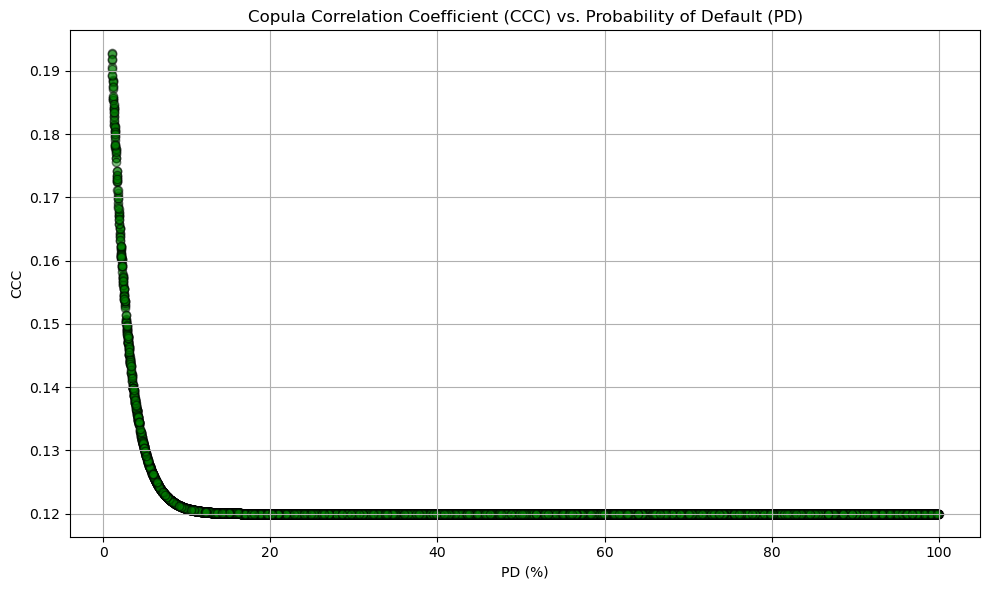

In [11]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(df['PD'], df['CCC'], alpha=0.5, color='green', edgecolor='black')
plt.title('Copula Correlation Coefficient (CCC) vs. Probability of Default (PD)')
plt.xlabel('PD (%)')
plt.ylabel('CCC')
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
#Print the Total Losses(Lp) arrived via simulations into a dataframe
# Convert list of total losses into a DataFrame
loss_df = pd.DataFrame({'Simulated_Loss': portfolio_losses})

# Display first 2000 rows
print(loss_df.head(2000))


      Simulated_Loss
0       1.073340e+08
1       1.072305e+08
2       1.147368e+08
3       1.088652e+08
4       1.005400e+08
...              ...
1995    9.658057e+07
1996    1.264510e+08
1997    1.063506e+08
1998    1.221309e+08
1999    1.186493e+08

[2000 rows x 1 columns]


In [15]:
# Calculate ECL (Expected Credit Loss) as the average loss
ECL = loss_df['Simulated_Loss'].mean()

# Calculate UCL (Unexpected Credit Loss) as the standard deviation
UCL = loss_df['Simulated_Loss'].std()

# Print the values
print(f"Expected Credit Loss (ECL): ₹{ECL:,.2f}")
print(f"Unexpected Credit Loss (UCL): ₹{UCL:,.2f}")


Expected Credit Loss (ECL): ₹109,130,016.54
Unexpected Credit Loss (UCL): ₹7,567,652.62


In [ ]:
--